In [126]:
import numpy as np
import sklearn, os
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve

In [127]:
baselines = "/Users/golf/Downloads/baseline_all_digit"
proposed = "/Users/golf/Downloads/exp_all_digit"
baseline_result = []
proposed_result = []

In [128]:
def read_csv_to_auc_mean(path):
    ret = []
    for digit in range(10):
        file_list = glob(os.path.join(path, "digit_%s"%digit, "test","plots","mean*.csv"))
#         print(file_list)
        best_auc = 0
        for file in file_list:
            mean=pd.read_csv(file)
            mean_n=np.array(mean[mean.labels==0]['scores'])
            mean_ab=np.array(mean[mean.labels==1]['scores'])
            means = np.concatenate([mean_n, mean_ab])
            labels = np.concatenate([np.zeros_like(mean_n),np.ones_like(mean_ab)])
            best_auc = max(best_auc, roc_auc_score(labels, means))
        ret.append(best_auc)
    return ret

In [129]:
def read_csv_to_auc_var(path):
    ret = []
    for digit in range(10):
        file_list = glob(os.path.join(path, "digit_%s"%digit, "test","plots","var*.csv"))
        best_auc = 0
        for file in file_list:
            mean=pd.read_csv(file)
            mean_n=np.array(mean[mean.labels==0]['var'])
            mean_ab=np.array(mean[mean.labels==1]['var'])
            means = np.concatenate([mean_n, mean_ab])
            labels = np.concatenate([np.zeros_like(mean_n),np.ones_like(mean_ab)])
            best_auc = max(best_auc, roc_auc_score(labels, means))
        ret.append(best_auc)
    return ret

In [130]:
proposed_result_mean = read_csv_to_auc_mean(proposed)
proposed_result_var = read_csv_to_auc_var(proposed)
baseline_result = read_csv_to_auc_mean(baselines)

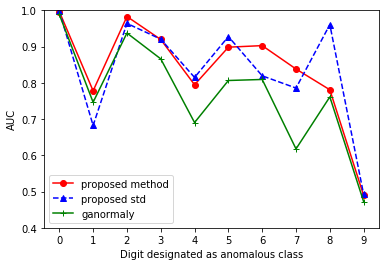

In [131]:
x = list(map(str,list(range(10))))

plt.plot(x, proposed_result_mean, 'ro-', label='proposed method')
plt.plot(x, proposed_result_var, 'b^--', label='proposed std')
plt.plot(x, baseline_result, 'g+-', label='ganormaly')
plt.ylim(0.4,1)
plt.xlabel('Digit designated as anomalous class')
plt.ylabel('AUC')
plt.legend()
# plt.title("Perfromance Comparison")
plt.savefig("comparison.png", dpi=300)